# Time series decomposition of the data cube

In [7]:
using CABLAB

In [8]:
c             = Cube("/Net/Groups/BGI/scratch/fgans/cubecopy/datacube/")
vars          = ["t2m","SoilMoisture","Emission"];
cdata         = getCubeData(c,latitude=(30,65), longitude=(-10,40),variable=vars); 

We want to decompose the time series into a signals of Trend, Seasonal cycle, low-frequency variations and high-frequency variantions. Here we use a Fourier-based approach by calling **filterTSFFT**. Before doing so, we need to do some gapFilling

Comments: 
1. cube address correct ? Uses old names 
2. using CABLAB produces warnings 


In [9]:
cube_filled=mapCube(gapFillMSC,cdata);

In [10]:
xout=mapCube(filterTSFFT,cube_filled)

Temporary Data Cube with the following dimensions
Time                Axis with 506 Elements from 2000-01-01T00:00:00 to 2010-12-27T00:00:00
TimeScale           Axis with elements: Trend Long-Term Variability Annual Cycle Fast Oscillations 
Lon                 Axis with 200 Elements from -10.0 to 39.75
Lat                 Axis with 140 Elements from 65.0 to 30.25
Variable            Axis with elements: t2m SoilMoisture Emission 


And we can plot the resulting decomposed time series

In [11]:
plotXY(xout,xaxis=TimeAxis,group="timescale",lon=35,lat=50.5,var=1)

In [12]:
variance=reduceCube(var, xout, TimeAxis, skipnull=true);

LoadError: LoadError: MethodError: no method matching /(::Nullable{Float32}, ::Int64)
Closest candidates are:
  /(!Matched::BigFloat, ::Union{Int16,Int32,Int64,Int8}) at mpfr.jl:267
  /(!Matched::Graphics.Vec2, ::Real) at /Net/Groups/BGI/scratch/tschick/julia-packages/v0.5/Graphics/src/Graphics.jl:66
  /(!Matched::Integer, ::Integer) at int.jl:35
  ...
while loading In[12], in expression starting on line 1

**Comments: Replace by reduceCube**
m=reduceCube(mean,d,TimeAxis,skipnull=true)

Let's look at a map of the variability in the Trend signal to see where trends in air temperature are strongest.

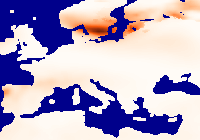

In [18]:
plotMAP(variance,timescale=1,var=1)

One can also check which areas have the strongest variance in the seasonal cycle

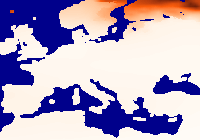

In [19]:
plotMAP(variance,timescale=3,var=1)